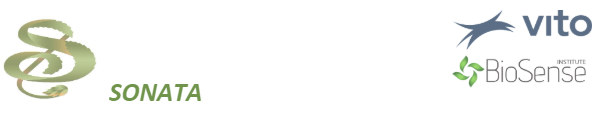
<br>
## training on VITO's hierarchical habitat mapping workflow for openEO processing platform
<br>
Copyrights, license and restrictions <br>
All code snippets, visualizations or/and workflow ideas are property of VITO. Work has been developed since 2021 and is still in development by VITO.
Showed public and private repositories are owned by VITO. <br>
(Re)sharing is only allowed with proper citation of the owners. Publications (peer-review, reports, ...) based partly and/or fully on VITO's hierarchical habitat mapping framework or on one of the provided GitHub repositories must be prior aligned with Dr. Marcel Buchhorn.
Code usage is allowed with proper citation, see author list in repository.
<br>
base repository: https://github.com/ESA-WEED-project/eo_processing

presented by: Dr. Marcel Buchhorn (VITO)
<br>

To run this Jupyter notebook you need the following:
- an CDSE account for data processing in [openEO](https://dataspace.copernicus.eu/). Via green button in the right top corner; following the [documentation to register](https://documentation.dataspace.copernicus.eu/Registration.html).
- an Anaconda Python environment with all needed packages installed
    - follow this manual to set up the Python environment: [python_dev_environment](https://github.com/ESA-WEED-project/.github/tree/main/python_dev_environment)
    - install the eo_processing package in your conda environment:
        - run `conda activate <your_env_name>`
        - run `pip install git+https://github.com/ESA-WEED-project/eo_processing.git@main#egg=eo_processing`

#### import the needed Python packages

In [3]:
from eo_processing.utils.helper import init_connection
from eo_processing.utils.jobmanager import get_AOI_interactive

#### connect to the openEO processing backend
Note: if you run it the first time then click on the LINK displayed after you executed the cell! Log-in with your credentials on the CDSE webpage and the token will be generated to execute processing in openEO.

In [4]:
backend = 'cdse'
# establish the connection to the selected backend
connection = init_connection(backend)

Authenticated using refresh token.


### test the openEO connection

In [5]:
connection.list_collections()

[{'description': 'Sentinel 3 imagery captured by OLCI sensor',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
  'id': 'SENTINEL3_OLCI_L1B',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
  'stac_version': '1.0.0',
  'title': 'Sentinel 3 OLCI'},
 {'description': 'Sentinel 3 imagery captured by SLSTR sensor',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
  'id': 'SENTINEL3_SLSTR',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
  'stac_version': '1.0.0',
  'title': 'Sentinel 3 SLSTR'},
 {'description': 'Sentinel 5 Precursor imagery captured by TROPOMI sensor.\n\nThis dataset only supports loading one band at a time.',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2018-04-30T00:18:50Z', None]]}},
  'id': 'SENTINEL_5P_L2',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://docs.sentinel-hub.c

### test installation of eo_processing package

In [6]:
# we specify the AOI interactive (you can also just load a GeoJson, shapely polygon or set a openEO BBOX manually)
get_AOI_interactive(map_center=(52.2, 6.9), zoom=11)

Please draw the AOI and press the EXPORT button.


All is working.